# Report: Where to build a GYM in Madrid, Spain?

By Jorge Martínez de Hurtado Aricha

## 1. Introduction: Business problem and stakeholders

The aim of this project is to discover where is the optimal place to build a gym in the city of Madrid, Spain. To answer this question we will analyze which districts have a gym and if there are any similarities between them. We will also see which districts have the least amount of gyms.

The audience of this report should be people interested in starting a new gym in the city of Madrid.

GYMs are increasing in popularity and provide great benefits such as:
* Health benefits
* Access to a vast variety of equipment
* Socialize
* Establish a healthy routine
* Motivation for other tasks

Taking those benefits into account, it is obvious that every district should have at least one gym.

## 2. Used data and source of the data.

* Geocode with openstreetmaps api to get the coordenates of each district

* Foursquare API: We will be using the Foursquare API to obtain data. Mainly, we will be using the Venues and the search endpoints.


Foursquare API provide geolocation of different business, in our case we will be interested in GYMs and Fitness Centers.


Sample of data:

**Using geocode**

In [153]:
print(f"Madrid Districts --> Rows:  {df.shape[0]}  Columns: {df.shape[1]}\n")
df.head()

Madrid Districts --> Rows:  21  Columns: 4



,District_Number,District_Name,Latitude,Longitude
0,1,Centro,40.417552,-3.707941
1,2,Arganzuela,40.398068,-3.693734
2,3,Retiro,40.408155,-3.677441
3,4,Salamanca,40.431527,-3.674726
4,5,Chamartín,40.460764,-3.677534


In [157]:
map_madrid = folium.Map(location=[Latitude[0], Longitude[0]], zoom_start=11)

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid) 

map_madrid

**Usign Foursquare API to get Madrid Venues**

In [152]:
print(f"Madrid Venues --> Rows:  {madrid_venues.shape[0]}  Columns: {madrid_venues.shape[1]}\n")
madrid_venues.head()

Madrid Venues --> Rows:  1038  Columns: 7



,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro,40.417552,-3.707941,TOC Hostel,40.417264,-3.705928,Hostel
1,Centro,40.417552,-3.707941,Plaza de Isabel II,40.418114,-3.709397,Plaza
2,Centro,40.417552,-3.707941,Plaza Mayor,40.415527,-3.707506,Plaza
3,Centro,40.417552,-3.707941,Amorino,40.416065,-3.708383,Ice Cream Shop
4,Centro,40.417552,-3.707941,Mistura Ice Cream & Coffee,40.415771,-3.708441,Ice Cream Shop


**Usign Foursquare API to get Madrid GYMs**

In [156]:
print(f"Madrid Gyms --> Rows:  {madrid_gyms.shape[0]}  Columns: {madrid_gyms.shape[1]}\n")
madrid_gyms.head()

Madrid Gyms --> Rows:  77  Columns: 7



,District,District Latitude,District Longitude,gym,gymLatitude,gymLongitude,Venue Category
0,Centro,40.417552,-3.707941,Myst Gym Club,40.416477,-3.705330,Gym
1,Centro,40.417552,-3.707941,The Cellar Gym,40.420685,-3.707365,Gym / Fitness Center
2,Centro,40.417552,-3.707941,Gym @ Hotel Liabeny,40.418476,-3.703958,Gym / Fitness Center
3,Centro,40.417552,-3.707941,Gym @ Hyatt Centric,40.419985,-3.703762,Gym / Fitness Center
4,Centro,40.417552,-3.707941,Pestana Gym,40.414791,-3.707039,Gym / Fitness Center


**To View how this dataframes where obtained please consult the code notebook**

## 3. Methodology

### Exploring and Cleaning Data

We need to know our data. We can do this through exploratory analysis. Once we know our data we can perform,  if necessary, some cleaning (In our case we will see that it is necessary)

#### Top places in Madrid and top places per district

First we analyze the categories of venues in Madrid

**Top Venues in Madrid**

In [190]:
df_topMadridVenues.head(15)

,Number
Category,
Spanish Restaurant,126
Restaurant,61
Tapas Restaurant,46
Bar,39
Grocery Store,28
Hotel,27
Café,26
Plaza,25
Supermarket,23


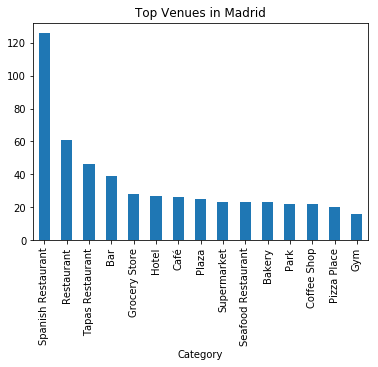

In [198]:
df_topMadridVenues.head(15).plot.bar()
plt.title("Top Venues in Madrid")
plt.legend().set_visible(False)
plt.show()

We can see that the most popular venues are restaurants as they occupied the top three positions. Gyms are in position number fifteen.

**Now let's analyze the top venues in Madrid by district.**

Here we have a table with each district and the top 10 most common venues in that district

**Top Venues in Madrid by district**

In [217]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_venues_sorted = pd.DataFrame(columns=columns)
District_venues_sorted['District'] = madrid_grouped['District']

for ind in np.arange(madrid_grouped.shape[0]):
    District_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

District_venues_sorted.head(21)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arganzuela,Restaurant,Spanish Restaurant,Grocery Store,Tapas Restaurant,Coffee Shop,Market,Gym / Fitness Center,Indie Theater,Gym,Chinese Restaurant
1,Barajas,Hotel,Spanish Restaurant,Airport,Tapas Restaurant,Restaurant,Coffee Shop,Plaza,Pizza Place,Metro Station,Gastropub
2,Carabanchel,Tapas Restaurant,Bakery,Grocery Store,Pizza Place,Café,Pharmacy,Pub,Fast Food Restaurant,Plaza,Bar
3,Centro,Plaza,Spanish Restaurant,Tapas Restaurant,Hotel,Café,Ice Cream Shop,Bookstore,Restaurant,Hostel,Theater
4,Chamartín,Spanish Restaurant,Restaurant,Plaza,Mediterranean Restaurant,Coffee Shop,Japanese Restaurant,Pizza Place,Seafood Restaurant,Steakhouse,Bar
5,Chamberí,Spanish Restaurant,Tapas Restaurant,Café,Bar,Restaurant,Theater,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Plaza
6,Ciudad Lineal,Spanish Restaurant,Grocery Store,Park,Restaurant,Chinese Restaurant,Bar,Hotel,Tapas Restaurant,Seafood Restaurant,Bakery
7,Hortaleza,Spanish Restaurant,Tapas Restaurant,Supermarket,Restaurant,Pool,Park,Falafel Restaurant,Fast Food Restaurant,Flea Market,Soccer Field
8,Latina,Metro Station,Bar,Train Station,Convenience Store,Smoke Shop,Light Rail Station,Spanish Restaurant,Flea Market,Fish Market,Fast Food Restaurant
9,Moncloa-Aravaca,Park,Hookah Bar,Track Stadium,Gym / Fitness Center,Coffee Shop,Exhibit,Dog Run,Fish Market,Fast Food Restaurant,Farmers Market


We have 20 districts when initially there where 21. This is because District "Fuencarral-El Pardo" has no venues. This is normal as this district is mostly occupied by a natural park.

In [222]:
madrid_venues.loc[madrid_venues["District"] == "Fuencarral-El Pardo"]

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


#### Exploring GYM Venues

We need to clean the gyms dataframe as there are entries that are not gyms, entries that are not properly classifed and duplicated items.

In [40]:
toDrop

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category
6,Centro,40.417552,-3.707941,The Gym @ Ohm,40.421685,-3.713022,Nightclub
13,Centro,40.417552,-3.707941,DoubleTree by Hilton,40.415197,-3.696738,Hotel
14,Centro,40.417552,-3.707941,Gymage,40.421278,-3.704796,Salon / Barbershop
15,Centro,40.417552,-3.707941,Gymage,40.412144,-3.706249,Other Nightlife
16,Centro,40.417552,-3.707941,Gymage Theater,40.421127,-3.702011,Restaurant
17,Centro,40.417552,-3.707941,Terraza Gymage,40.421438,-3.704736,Beer Garden
34,Salamanca,40.431527,-3.674726,Gym Hermosilla 56,40.426059,-3.680907,General Entertainment
35,Salamanca,40.431527,-3.674726,NOVU Skin Gym,40.426028,-3.676213,Supplement Shop
44,Salamanca,40.431527,-3.674726,zanox Hispania,40.429128,-3.674989,Coworking Space
48,Chamartín,40.460764,-3.677534,Bicicleta Holiday Gym,40.458514,-3.679297,Bike Shop


Also some of these results are actually gyms such as the row with index 34. This tell us that some of the results are not properly classified. This is taken into account (See the code notebook)

Before cleaning the dataframe we have 77 entries

In [34]:
madrid_gyms.shape

(77, 7)

After cleaning the datframe we have 67 entries

In [46]:
madrid_gyms.shape

(67, 7)

Take a look into the code notebook if you wish to revise the cleaning process

In [70]:
madrid_gyms.head()

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category
0,Centro,40.417552,-3.707941,Myst Gym Club,40.416477,-3.705330,Gym
1,Centro,40.417552,-3.707941,The Cellar Gym,40.420685,-3.707365,Gym / Fitness Center
2,Centro,40.417552,-3.707941,Gym @ Hotel Liabeny,40.418476,-3.703958,Gym / Fitness Center
3,Centro,40.417552,-3.707941,Gym @ Hyatt Centric,40.419985,-3.703762,Gym / Fitness Center
4,Centro,40.417552,-3.707941,Pestana Gym,40.414791,-3.707039,Gym / Fitness Center


This is our final gym dataframe.

Gyms in a map:

In [71]:
map_gyms = folium.Map(location=[Latitude[0], Longitude[0]], zoom_start=11)

for lat, lng, label in zip(madrid_gyms['gym_Latitude'], madrid_gyms['gym_Longitude'], madrid_gyms['gym']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gyms) 

map_gyms

**Let's combine districts and gyms in a map**

In [72]:
distritos_geo = r"distritos.geojson"

We load a geojson file with the information of the districts

In [75]:
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gyms) 
map_gyms

#### Gyms per District

We can view how many gyms are in each district

In [76]:
madrid_gyms.groupby("District").count()

,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category
District,,,,,,
Arganzuela,5,5,5,5,5,5
Centro,12,12,12,12,12,12
Chamartín,6,6,6,6,6,6
Chamberí,10,10,10,10,10,10
Ciudad Lineal,2,2,2,2,2,2
Latina,1,1,1,1,1,1
Moncloa-Aravaca,1,1,1,1,1,1
Puente de Vallecas,1,1,1,1,1,1
Retiro,5,5,5,5,5,5


### Machine Learning: Clustering

We are going to cluster the districts and then see if there is any relation between the type of cluster and the number of gyms.

We create 10 clusters

You can see the clusters in the following map

In [58]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[Latitude[0], Longitude[0]], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['District'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## 4. Results

In this section we analyze if there is a relation between the clusters and the number of gyms:

#### Cluster 0

In [69]:
cluster0

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,Puente de Vallecas,Supermarket,Bar,Grocery Store,Clothing Store,Park


In [70]:
madrid_gyms[madrid_gyms["District"].isin(cluster0["District"])]

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category
74,Puente de Vallecas,40.383553,-3.654535,Palomeras Gym,40.385078,-3.65304,Gym / Fitness Center


**Number of Gyms: 1**

#### Cluster 1

In [71]:
cluster1

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,Villa de Vallecas,Shoe Store,Wine Bar,Dumpling Restaurant,Flea Market,Fish Market


In [72]:
madrid_gyms[madrid_gyms["District"].isin(cluster1["District"])]

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category


**Number of Gyms: 0**

#### Cluster 2

In [73]:
cluster2

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
18,Vicálvaro,Mediterranean Restaurant,Wine Bar,Eastern European Restaurant,Food,Flea Market


In [74]:
madrid_gyms[madrid_gyms["District"].isin(cluster2["District"])]

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category


**Number of Gyms: 0**

#### Cluster 3

In [75]:
cluster3

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Salamanca,Spanish Restaurant,Restaurant,Seafood Restaurant,Indian Restaurant,Supermarket
4,Chamartín,Spanish Restaurant,Restaurant,Plaza,Mediterranean Restaurant,Coffee Shop
5,Tetuán,Spanish Restaurant,Restaurant,Tapas Restaurant,Seafood Restaurant,Hotel
6,Chamberí,Spanish Restaurant,Tapas Restaurant,Café,Bar,Restaurant
11,Usera,Spanish Restaurant,Café,Restaurant,Seafood Restaurant,Beer Garden
14,Ciudad Lineal,Spanish Restaurant,Grocery Store,Park,Restaurant,Chinese Restaurant
15,Hortaleza,Spanish Restaurant,Tapas Restaurant,Supermarket,Restaurant,Pool


In [93]:
madrid_gyms[madrid_gyms["District"].isin(cluster3["District"])]

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category
28,Salamanca,40.431527,-3.674726,Holiday Gym,40.426285,-3.674044,Gym / Fitness Center
29,Salamanca,40.431527,-3.674726,Holiday Gym,40.429811,-3.676724,Gym
30,Salamanca,40.431527,-3.674726,Wifit Gym,40.431892,-3.670209,Gym
31,Salamanca,40.431527,-3.674726,VivaGym Príncipe de Vergara,40.440375,-3.678987,Gymnastics Gym
32,Salamanca,40.431527,-3.674726,Fintonic Gym,40.429897,-3.672953,Gym
33,Salamanca,40.431527,-3.674726,Training Gym,40.428839,-3.677544,Gym / Fitness Center
34,Salamanca,40.431527,-3.674726,Gym Hermosilla 56,40.426059,-3.680907,General Entertainment
35,Salamanca,40.431527,-3.674726,NOVU Skin Gym,40.426028,-3.676213,Supplement Shop
36,Salamanca,40.431527,-3.674726,Indy's Gym,40.434357,-3.681305,Gym
37,Salamanca,40.431527,-3.674726,Aerobic Gym Moscardó,40.437994,-3.674285,Gym


**Number of Gyms: 42**

#### Cluster 4

In [77]:
cluster4

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Moncloa-Aravaca,Park,Hookah Bar,Track Stadium,Gym / Fitness Center,Coffee Shop


In [78]:
madrid_gyms[madrid_gyms["District"].isin(cluster4["District"])]

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category
72,Moncloa-Aravaca,40.439495,-3.744204,Clicker Gym,40.451278,-3.741914,Dog Run


**Number of Gyms: 1**

#### Cluster 5

In [79]:
cluster5

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Centro,Plaza,Spanish Restaurant,Tapas Restaurant,Hotel,Café
1,Arganzuela,Restaurant,Spanish Restaurant,Grocery Store,Tapas Restaurant,Coffee Shop
2,Retiro,Bar,Spanish Restaurant,Bakery,Supermarket,Museum
19,San Blas - Canillejas,Grocery Store,Tapas Restaurant,Seafood Restaurant,Bar,Gym


In [95]:
madrid_gyms[madrid_gyms["District"].isin(cluster5["District"])]

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category
0,Centro,40.417552,-3.707941,The Cellar Gym,40.420685,-3.707365,Gym / Fitness Center
1,Centro,40.417552,-3.707941,Myst Gym Club,40.416477,-3.705330,Gym
2,Centro,40.417552,-3.707941,Gym @ Hotel Liabeny,40.418476,-3.703958,Gym / Fitness Center
3,Centro,40.417552,-3.707941,Gym @ Hyatt Centric,40.419985,-3.703762,Gym / Fitness Center
4,Centro,40.417552,-3.707941,Pestana Gym,40.414791,-3.707039,Gym / Fitness Center
5,Centro,40.417552,-3.707941,Opera Gym,40.420130,-3.709618,Gym / Fitness Center
7,Centro,40.417552,-3.707941,Gym Hotel Catalonia Plaza Mayor,40.413108,-3.700931,Gym
8,Centro,40.417552,-3.707941,Gym Libertad,40.420622,-3.697422,Gym / Fitness Center
9,Centro,40.417552,-3.707941,Kross Gym,40.412895,-3.712868,Gym
10,Centro,40.417552,-3.707941,Peter' gym,40.424707,-3.705965,Gym


**Number of Gyms: 22**

#### Cluster 6

In [81]:
cluster6

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,Latina,Metro Station,Bar,Train Station,Convenience Store,Smoke Shop


In [96]:
madrid_gyms[madrid_gyms["District"].isin(cluster6["District"])]

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category
73,Latina,40.388068,-3.786606,Gym,40.395153,-3.774079,Gym


**Number of Gyms: 1**

#### Cluster 7

In [83]:
cluster7

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
20,Barajas,Hotel,Spanish Restaurant,Airport,Tapas Restaurant,Restaurant


In [84]:
madrid_gyms[madrid_gyms["District"].isin(cluster7["District"])]

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category


**Number of Gyms: 0**

#### Cluster 8

In [85]:
cluster8

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,Villaverde,Spanish Restaurant,Mediterranean Restaurant,Train Station,Park,Grocery Store


In [86]:
madrid_gyms[madrid_gyms["District"].isin(cluster8["District"])]

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category


**Number of Gyms: 0**

#### Cluster 9

In [87]:
cluster9

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,Carabanchel,Tapas Restaurant,Bakery,Grocery Store,Pizza Place,Café
13,Moratalaz,Plaza,Spanish Restaurant,Park,Bar,Bakery


In [88]:
madrid_gyms[madrid_gyms["District"].isin(cluster9["District"])]

,District,District Latitude,District Longitude,gym,gym_Latitude,gym_Longitude,Venue Category


**Number of Gyms: 0**

Also, we can see the distribution of the gyms in the map

In [75]:
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gyms) 
map_gyms

## 5. Discussion

We can see that most gyms are situated in the center of Madrid. These districts are also the most expensive ones to live in. It might be worthwhile to see if there is any correlation between the economy of each district and the number of gyms it has, although this is out of the scope of this project.

In my opinion, foursquare does not return all gyms that are in existence. We are interested in the relative results between the districts but we don't know if foursquare have more data for some districts than others.

We can see that the the cluster that have the most gyms are the ones that also have the most restaurants.

## 6. Conclusion

To conclude, if you wish to build a gym in Madrid you should search for a district that is not saturated with gyms like the center districts. For the remaining districts you should choose the one that has the most amount of restaurants.